In [102]:
import pandas as pd
from scipy.stats import skew
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline



In [82]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [84]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
pd.set_option('display.max_colwidth', 1)

# Show unique data in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_unique

,Column Name,Number of Unique,Unique Sample
0,customer_id,10000,"[15634602, 15647311, 15619304, 15701354, 15737888, 15574012, 15592531, 15656148, 15792365, 15592389, 15767821, 15737173, 15632264, 15691483, 15600882, 15643966, 15737452, 15788218, 15661507, 15568982, 15577657, 15597945, 15699309, 15725737, 15625047, 15738191, 15736816, 15700772, 15728693, 15656300, 15589475, 15706552, 15750181, 15659428, 15732963, 15794171, 15788448, 15729599, 15717426, 15585768, 15619360, 15738148, 15687946, 15755196, 15684171, 15754849, 15602280, 15771573, 15766205, 15771873, 15616550, 15768193, 15683553, 15702298, 15569590, 15760861, 15630053, 15647091, 15623944, 15804771, 15651280, 15773469, 15702014, 15751208, 15592461, 15789484, 15696061, 15641582, 15638424, 15755648, 15703793, 15620344, 15812518, 15779052, 15770811, 15780961, 15614049, 15662085, 15575185, 15803136, 15706021, 15663706, 15641732, 15701164, 15738751, 15805254, 15762418, 15625759, 15622897, 15767954, 15757535, 15731511, 15809248, 15640635, 15676966, 15699461, 15738721, 15693683, 15604348, 15633059, ...]"
1,credit_score,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476, 549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756, 571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472, 465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601, 656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675, 738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506, 493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814, 710, 413, 623, 670, 622, 785, 605, 479, 685, ...]"
2,country,3,"[France, Spain, Germany]"
3,gender,2,"[Female, Male]"
4,age,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38, 46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30, 28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68, 23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81, 92, 83]"
5,tenure,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
6,balance,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78, 115046.74, 142051.07, 134603.88, 102016.72, 143129.41, 132602.88, 136815.64, 141349.43, 59697.17, 85311.7, 110112.54, 134264.04, 145260.23, 76548.6, 70349.48, 122522.32, 117419.35, 131394.56, 155931.11, 109421.13, 112045.67, 137843.8, 103391.38, 103769.22, 116363.37, 146050.97, 125561.97, 98495.72, 125211.92, 127864.4, 75888.2, 40685.92, 136857.0, 152328.88, 56084.69, 78707.16, 109166.37, 169831.46, 101633.04, 123180.01, 150725.53, 98373.26, 133745.44, 163607.18, 157780.84, 178718.19, 77253.22, 122189.66, 96645.54, 90307.62, 121681.82, 81623.67, 118626.55, 176273.95, 102827.44, 97086.4, 82674.15, 107073.27, 88938.62, 99806.85, 150092.8, 92833.89, 90536.81, 108055.1, 100238.35, 106190.55, 154475.54, 132351.29, 167864.4, 107818.63, 185173.81, 129433.34, 120193.42, 126384.42, 152603.45, 148507.24, 101827.07, 130862.43, 122570.87, 124828.46, 144895.05, 63663.93, 133463.1, 213146.2, 129490.36, 137452.09, 125851.93, 40915.55, 113157.22, 138296.94, 106967.18, 120681.63, 127609.59, 97259.25, 123246.7, ...]"
7,products_number,4,"[1, 3, 2, 4]"
8,credit_card,2,"[1, 0]"
9,active_member,2,"[1, 0]"


In [112]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.drop(columns='customer_id', inplace = True)

In [99]:
# Numerical columns
num_cols = list(df.select_dtypes(include=['int', 'float']))
num_cols.remove('churn')
num_cols.remove('credit_card')
num_cols.remove('active_member')

# Categorical columns 
cat_cols = list(df.select_dtypes(include='object'))

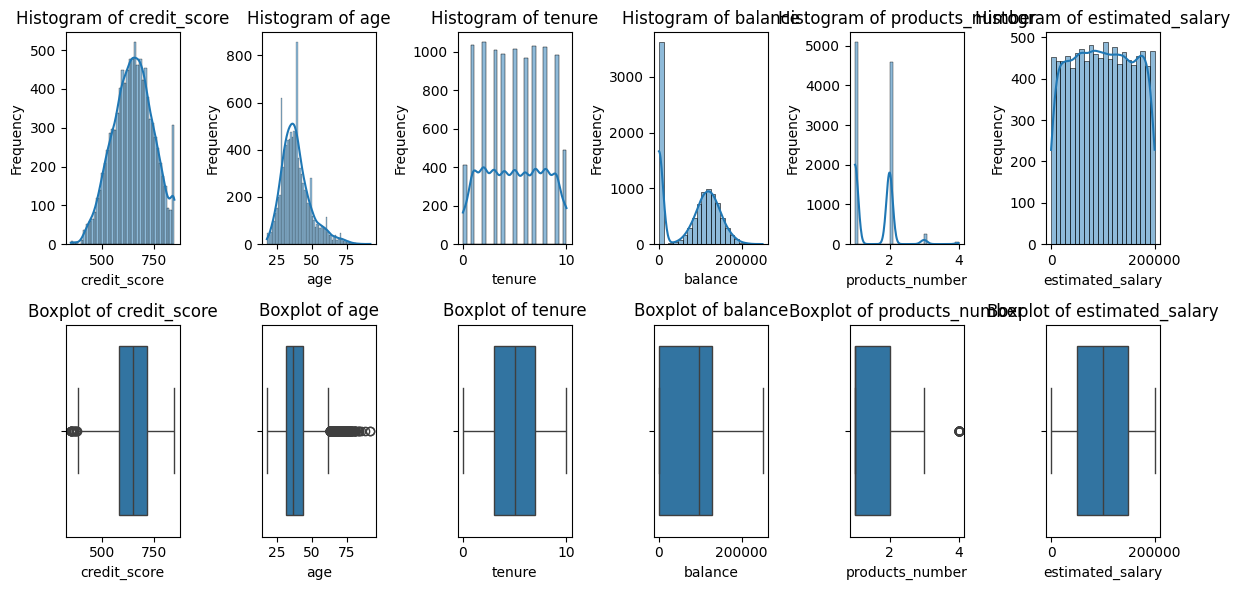

In [103]:
plt.figure(figsize=(12, 6))

# Iterate over the numerical columns
for i, column in enumerate(num_cols, 1):
    
    # Plot histogram (first row)
    plt.subplot(2, len(num_cols), i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Plot boxplot (second row)
    plt.subplot(2, len(num_cols), i + len(num_cols))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [113]:
skewness = []
for col in num_cols:
    skewness.append(skew(df[col]))

skew_result = pd.DataFrame({'Column' : num_cols, 'Skewness' : skewness})

In [114]:
skew_result

,Column,Skewness
0,credit_score,-0.071596
1,age,1.011169
2,tenure,0.010990
3,balance,-0.141088
4,products_number,0.745456
5,estimated_salary,0.002085


In [89]:
from scipy.stats import normaltest

alpha = 0.05    # significance level
normal_test = []

for col in num_cols:
    statistic, p_value = normaltest(df[col])
    if p_value < alpha:
        decision = 'Reject H0'
        distribution = 'Not normally distributed'
    else:
        decision = 'Do not reject H0'
        distribution = 'Normally distributed'
    normal_test.append([col, round(statistic, 3), p_value, decision, distribution])

normal_result = pd.DataFrame(data=normal_test, columns = ['Column', 'Statistic Value', 'P-value', 'Decision', 'Distribution'])
normal_result

,Column,Statistic Value,P-value,Decision,Distribution
0,credit_score,132.828,1.434445e-29,Reject H0,Not normally distributed
1,age,1507.791,0.000000e+00,Reject H0,Not normally distributed
2,tenure,6481.918,0.000000e+00,Reject H0,Not normally distributed
3,balance,62973.390,0.000000e+00,Reject H0,Not normally distributed
4,products_number,832.989,1.314518e-181,Reject H0,Not normally distributed
5,credit_card,8759.537,0.000000e+00,Reject H0,Not normally distributed
6,active_member,34476.145,0.000000e+00,Reject H0,Not normally distributed
7,estimated_salary,7397.150,0.000000e+00,Reject H0,Not normally distributed


## Data Visualization

In [116]:
data = df['age']

Text(0.5, 1.0, 'Original Age Data')

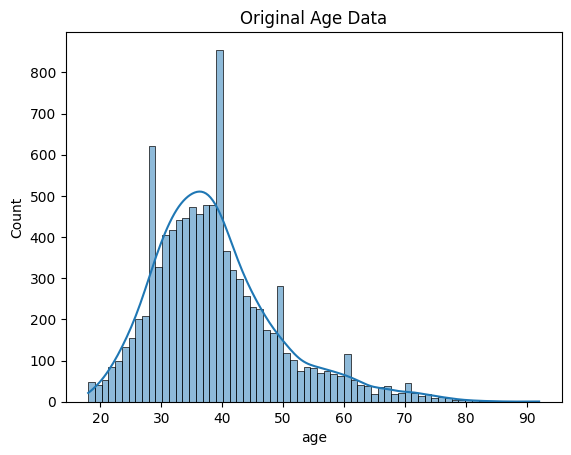

In [123]:
sns.histplot(df['age'], kde=True)
plt.title('Original Age Data')

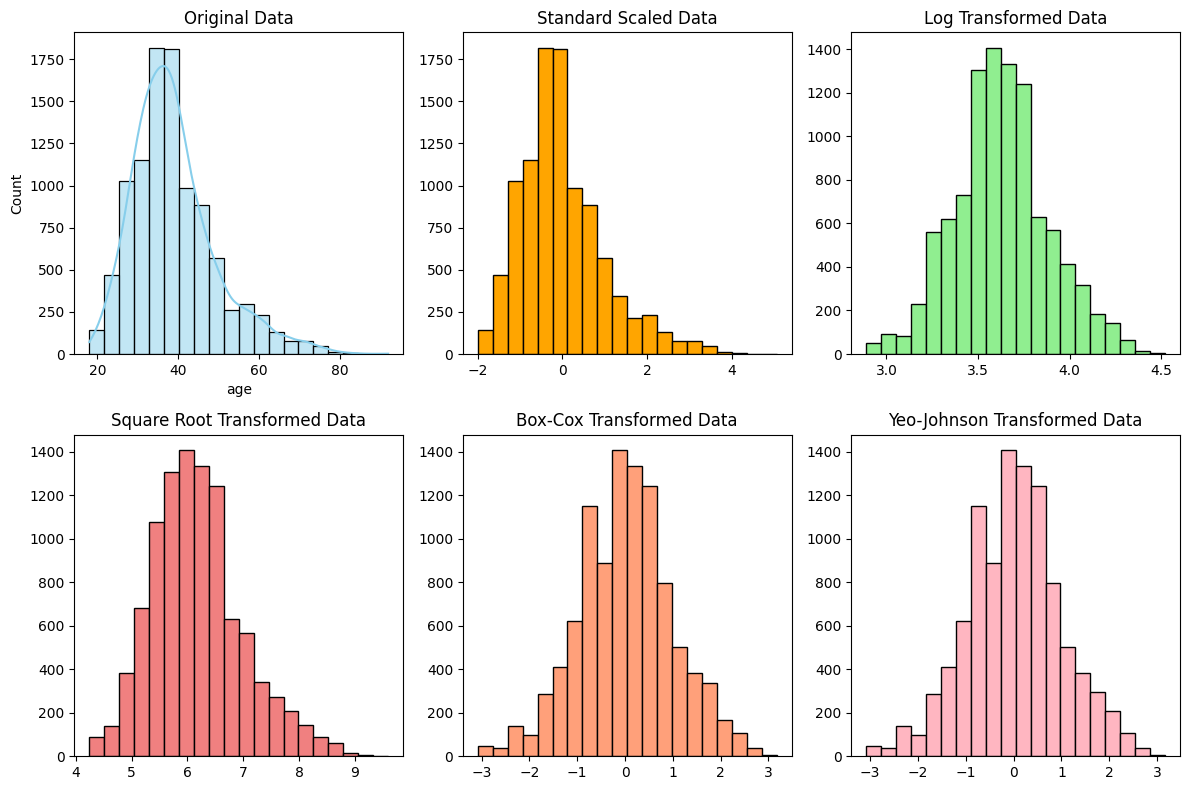

Original Data:  0    42
1    41
2    42
3    39
4    43
Name: age, dtype: int64

Standard Scaled Data:  [[0.29351742]
 [0.19816383]
 [0.29351742]
 [0.00745665]
 [0.38887101]]

Log Transformed Data:  [[3.73766962]
 [3.71357207]
 [3.73766962]
 [3.66356165]
 [3.76120012]]

Square Root Transformed Data:  [[6.4807407 ]
 [6.40312424]
 [6.4807407 ]
 [6.244998  ]
 [6.55743852]]

Box-Cox Transformed Data:  [[0.45074704]
 [0.35927108]
 [0.45074704]
 [0.16784365]
 [0.53959478]]

Yeo-Johnson Transformed Data:  [[0.45128622]
 [0.35973237]
 [0.45128622]
 [0.16811731]
 [0.54020029]]


In [128]:
# Standard Scaler
transformer = StandardScaler()
std_scaler = transformer.fit_transform(data.values.reshape(-1, 1))

# Log Transformation 
transformer = FunctionTransformer(np.log)
log_transformed_data = transformer.fit_transform(data.values.reshape(-1, 1))

# Square Root Transformation
transformer = FunctionTransformer(np.sqrt)
sqrt_transformed_data = transformer.fit_transform(data.values.reshape(-1, 1))

# Box-Cox Transformation
transformer = PowerTransformer(method='box-cox', standardize=True)
boxcox_transformed_data = transformer.fit_transform(data.values.reshape(-1, 1))

# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson', standardize = True)
yeo_johnson_transformed_data = transformer.fit_transform(data.values.reshape(-1, 1))


# Plotting the original and transformed data for comparison
plt.figure(figsize=(12, 8))

# Original Data
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='age', bins=20, color='skyblue', kde=True)
plt.title('Original Data')

# Standard Scaled Data
plt.subplot(2, 3, 2)
plt.hist(std_scaler, bins=20, color='orange', edgecolor='black')
plt.title('Standard Scaled Data')

# Log Transformed Data
plt.subplot(2, 3, 3)
plt.hist(log_transformed_data, bins=20, color='lightgreen', edgecolor='black')
plt.title('Log Transformed Data')

# Square Root Transformed Data
plt.subplot(2, 3, 4)
plt.hist(sqrt_transformed_data, bins=20, color='lightcoral', edgecolor='black')
plt.title('Square Root Transformed Data')

# Box-Cox Transformed Data
plt.subplot(2, 3, 5)
plt.hist(boxcox_transformed_data, bins=20, color='lightsalmon', edgecolor='black')
plt.title('Box-Cox Transformed Data')

# Yeo-Johnson Transformed Data
plt.subplot(2, 3, 6)
plt.hist(yeo_johnson_transformed_data, bins=20, color='lightpink', edgecolor='black')
plt.title('Yeo-Johnson Transformed Data')

plt.tight_layout()
plt.show()

# Displaying some sample outputs of transformations
print("Original Data: ", data.head())
print("\nStandard Scaled Data: ", std_scaler[:5])
print("\nLog Transformed Data: ", log_transformed_data[:5])
print("\nSquare Root Transformed Data: ", sqrt_transformed_data[:5])
print("\nBox-Cox Transformed Data: ", boxcox_transformed_data[:5])
print("\nYeo-Johnson Transformed Data: ", yeo_johnson_transformed_data[:5])


In [138]:
# Separate features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Identify categorical and numerical columns
categorical_cols = ['country', 'gender']
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 
                  'products_number', 'estimated_salary']
standard_cols = ['credit_score', 'tenure', 'balance', 'estimated_salary', 'products_number']
power_cols = ['age']

# Random state
rs = 10

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs, stratify=y)


# Preprocessing pipeline with PowerTransformer
power_transformer = ColumnTransformer([
        ('power', PowerTransformer(standardize=True, method='box-cox'), power_cols),
        ('standard', StandardScaler(), standard_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder='passthrough')

sqrt_transformer = ColumnTransformer([
        ('sqrt', FunctionTransformer(np.sqrt), power_cols),
        ('standard', StandardScaler(), standard_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder = 'passthrough')

log_transformer = ColumnTransformer([
        ('log', FunctionTransformer(np.log), power_cols),
        ('standard', StandardScaler(), standard_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder = 'passthrough')

# Preprocessing pipeline with StandardScaler
scaler_transformer = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder = 'passthrough')

In [139]:
transformers = {
    'Box-Cox' : power_transformer,
    'Square Root Transformer' : sqrt_transformer,
    'LogTransformer' : log_transformer,
    'StandardScaler' : scaler_transformer
}

In [140]:
logreg = LogisticRegression(random_state=rs)
dt = DecisionTreeClassifier(random_state=rs)


In [141]:
models = {
    'LogisticRegression' : logreg,
    'DecisionTree' : dt
}

In [142]:
ros = RandomOverSampler(random_state = rs)

In [143]:
names = []
accuracy_test = []
recall_test = []

for mod in models.items():
    for trans in transformers.items():
        model_name = mod[0]
        model = mod[1]

        transformer_name = trans[0]
        transformer = trans[1]

        trans_name = f'{model_name} - {transformer_name}'
        
        # Model pipeline
        pipe_model = Pipeline([
            ('transformer', transformer),
            ('model', model)
        ])

        # Fit model
        pipe_model.fit(X_train, y_train)

        y_pred = pipe_model.predict(X_test)

        # Evaluate Model
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        names.append(trans_name)
        accuracy_test.append(accuracy)
        recall_test.append(recall)


In [144]:
results_df = pd.DataFrame(
{    'Model Name' : names,
    'Accuracy' : accuracy_test,
    'Recall' : recall_test}
)

results_df

,Model Name,Accuracy,Recall
0,LogisticRegression - Box-Cox,0.810333,0.229133
1,LogisticRegression - Square Root Transformer,0.810667,0.230769
2,LogisticRegression - LogTransformer,0.810667,0.225859
3,LogisticRegression - StandardScaler,0.807667,0.216039
4,DecisionTree - Box-Cox,0.794000,0.490998
5,DecisionTree - Square Root Transformer,0.794000,0.490998
6,DecisionTree - LogTransformer,0.794000,0.490998
7,DecisionTree - StandardScaler,0.794667,0.497545


In [145]:
names = []
accuracy_test = []
recall_test = []

for mod in models.items():
    for trans in transformers.items():
        model_name = mod[0]
        model = mod[1]

        transformer_name = trans[0]
        transformer = trans[1]

        trans_name = f'{model_name} - {transformer_name}'
        
        # Model pipeline
        pipe_model = Pipeline([
            ('resampler', ros),
            ('transformer', transformer),
            ('model', model)
        ])

        # Fit model
        pipe_model.fit(X_train, y_train)

        y_pred = pipe_model.predict(X_test)

        # Evaluate Model
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        names.append(trans_name)
        accuracy_test.append(accuracy)
        recall_test.append(recall)


In [146]:
results_df = pd.DataFrame(
{    'Model Name' : names,
    'Accuracy' : accuracy_test,
    'Recall' : recall_test}
)

results_df

,Model Name,Accuracy,Recall
0,LogisticRegression - Box-Cox,0.705000,0.698854
1,LogisticRegression - Square Root Transformer,0.703667,0.692308
2,LogisticRegression - LogTransformer,0.704000,0.703764
3,LogisticRegression - StandardScaler,0.704667,0.677578
4,DecisionTree - Box-Cox,0.800000,0.487725
5,DecisionTree - Square Root Transformer,0.800000,0.487725
6,DecisionTree - LogTransformer,0.800000,0.487725
7,DecisionTree - StandardScaler,0.798333,0.486088
